<a href="https://colab.research.google.com/github/felixlys/forecast_with_StochProcess/blob/main/Aproksikmasi_Terbaru_SimulasiOUProcess__Cos_2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)
library(readxl)
library(readxl)
library(ggpubr)
library(rstatix)
library(car)
library(ggsignif)
library(epitools)
library(factoextra)
library(FactoMineR)
library(plotly)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(ggpubr): there is no package called ‘ggpubr’


In [ ]:
data_2<-read_excel('Data_Approx2_Cos_Ulang_Lengkap.xlsx')
sum1<-sum((data_2$mean[-1] - data_2$MeanTemp[-1]) * (data_2$mean - data_2$MeanTemp) / data_2$varians[-1])
sum2<-sum((data_2$mean[-1] - data_2$MeanTemp[-1]) * (data_2$mean[-1] - data_2$MeanTemp[-1]) / data_2$varians[-1])
alpha<--log(sum1/sum2)

New names:
• `` -> `...1`
Warning message in (data_2$mean[-1] - data_2$MeanTemp[-1]) * (data_2$mean - data_2$MeanTemp):
“longer object length is not a multiple of shorter object length”
Warning message in (data_2$mean[-1] - data_2$MeanTemp[-1]) * (data_2$mean - data_2$MeanTemp)/data_2$varians[-1]:
“longer object length is not a multiple of shorter object length”


In [ ]:
print(alpha)

[1] 0.3609352


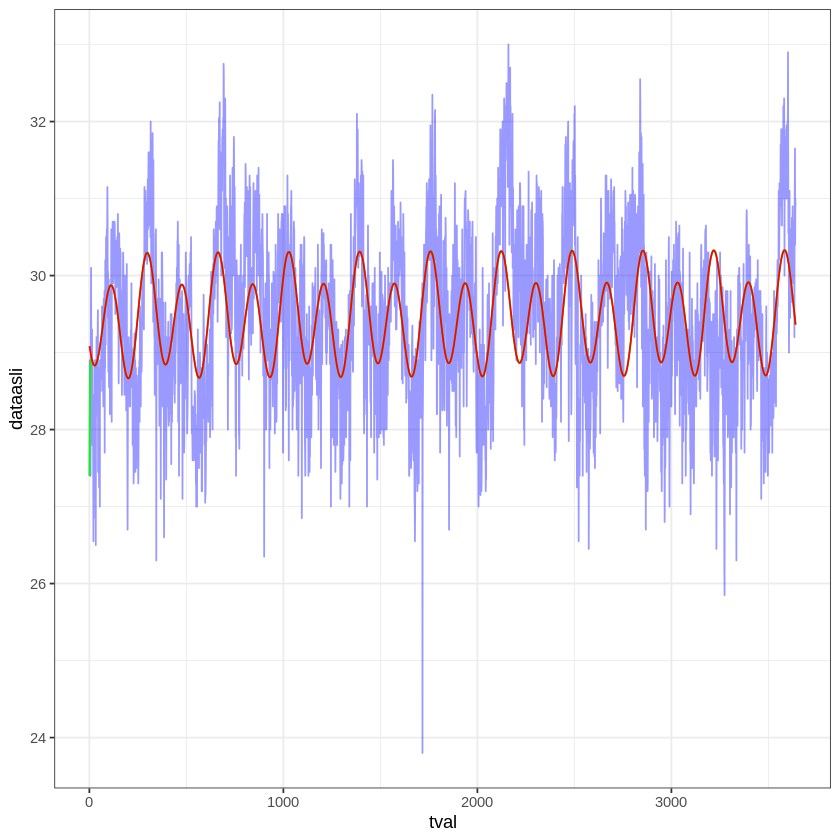

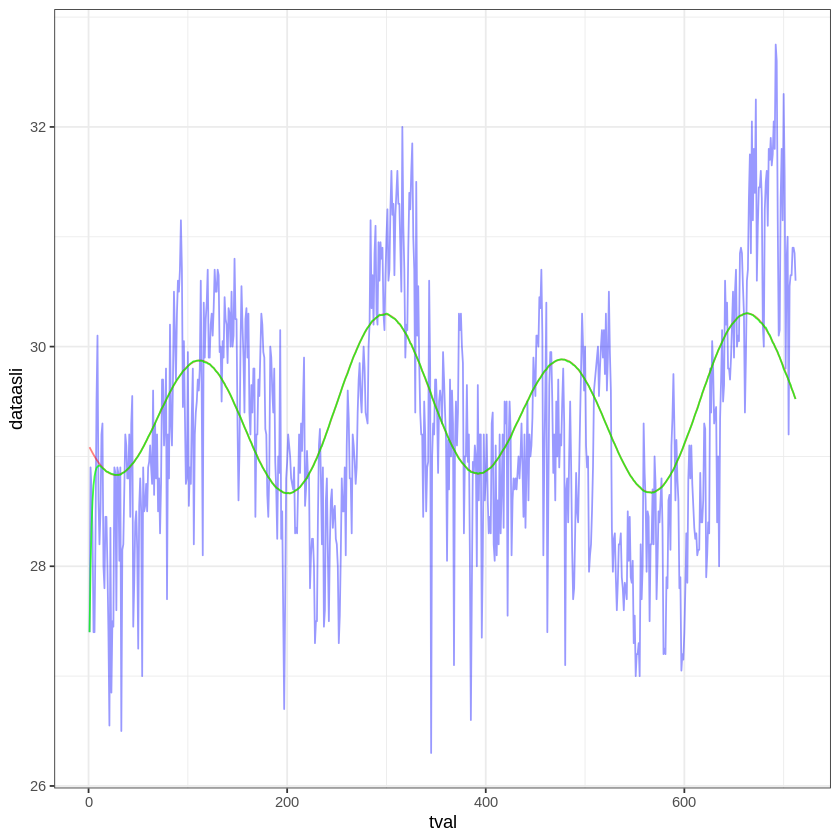

In [ ]:
set.seed(123)  # Gantilah nilai alpha sesuai kebutuhan
jum <- 100000
par2 <- data_2$varians
N <- nrow(data_2)
Dt <- 1
Z <- matrix(rnorm(N * jum, 0, 1), ncol = jum)  # 100,000 simulasi
T0<-27.40
TM0<-29.13285
B <- data_2$MeanTemp
simulations <- matrix(NA, nrow = N + 1, ncol = jum)

for (sim in 1:jum) {
  Tsim <- numeric(N + 1)
  Tsim[1] <- T0
  for (i in 1:N) {
    Tsim[i + 1] <- B[i + 1] + (1 - alpha) * (Tsim[i] - B[i]) + sqrt(par2[i]) * sqrt(Dt) * Z[i, sim]
  }
  simulations[, sim] <- Tsim
}
mean_simulations <- rowMeans(simulations, na.rm = TRUE)
df5<-data.frame(tval=seq(1,N),dataasli=data_2$mean,MeanTemp=data_2$MeanTemp,OU=mean_simulations[1:nrow(data_2)])
ggplot(df5, aes(x = tval)) +
  geom_line(aes(y = dataasli), color = "blue", alpha = 0.4) +
  geom_line(aes(y = OU), color = "green", alpha = 2) +
  geom_line(aes(y = MeanTemp), color = "red", alpha = 1.5) +
  theme_bw()
df6<-data.frame(tval=seq(1,712),dataasli=data_2$mean[1:712],MeanTemp=data_2$MeanTemp[1:712],OU=mean_simulations[1:712])
ggplot(df6, aes(x = tval)) +
  geom_line(aes(y = dataasli), color = "blue", alpha = 0.4) +
  geom_line(aes(y = MeanTemp), color = "red", alpha = 0.5)+
  geom_line(aes(y = OU), color = "green", alpha = 0.75) +
  theme_bw()
#MAPE
MAPE <- function(actual, forecast) {
  n <- length(actual)
  mape <- (100/n) * sum(abs((actual - forecast) / actual))
  return(mape)
}
mape_Euler<- MAPE(data_2$mean, mean_simulations[1:nrow(data_2)])

In [ ]:
print(mape_Euler)

[1] 2.455096


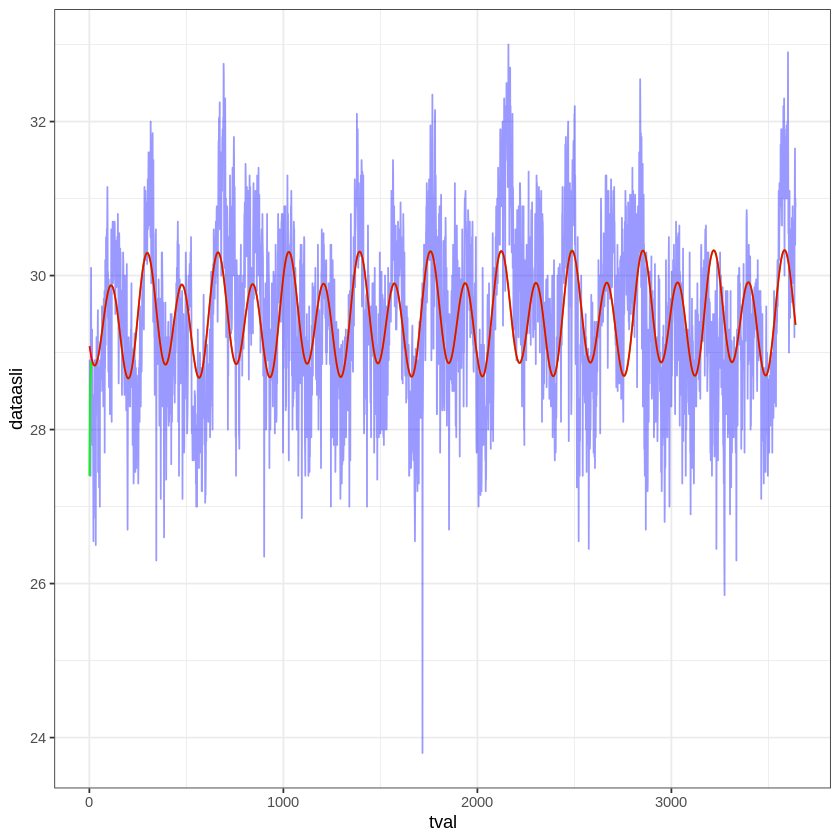

ERROR: Error in MAPE(data_2$mean, mean_simulations1[1:nrow(data_2)]): could not find function "MAPE"


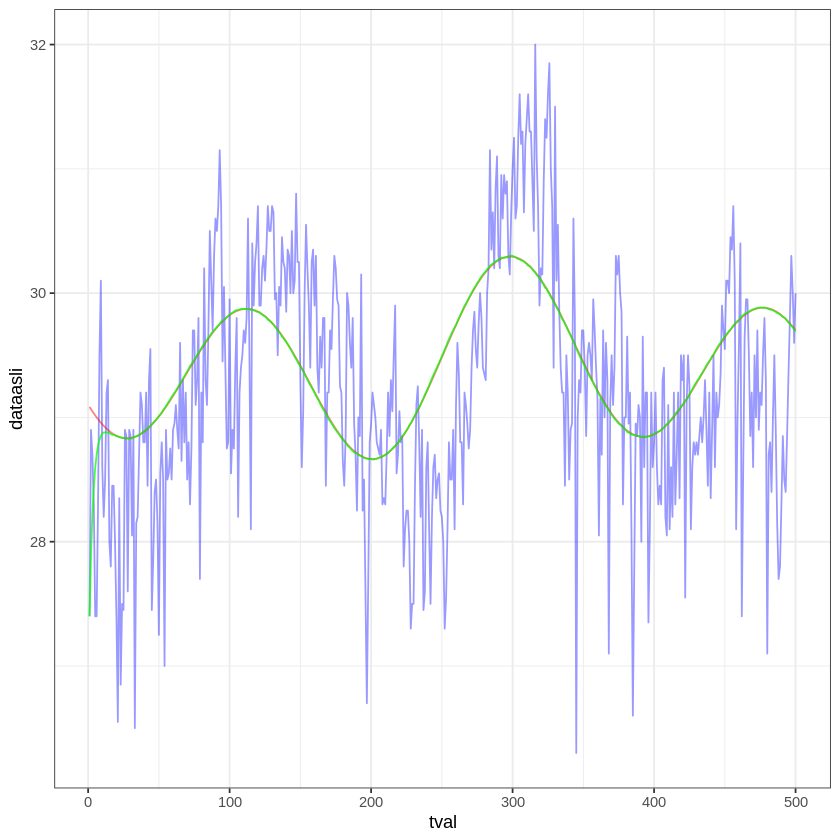

In [ ]:
set.seed(123)  # Gantilah nilai alpha sesuai kebutuhan
par2 <- data_2$varians
jum<-100000
N <- nrow(data_2)
Dt <- 1
Z <- matrix(rnorm(N * jum, 0, 1), ncol = jum)  # 100,000 simulasi
T0<-27.40
TM0<-29.13285
B <- data_2$MeanTemp
simulations <- matrix(NA, nrow = N + 1, ncol = jum)
for (sim in 1:jum) {
  Tsim <- numeric(N + 1)
  Tsim[1] <- T0
  for (i in 2:N) {
    Tpred <- B[i] + (1 - alpha) * (Tsim[i - 1] - B[i]) + sqrt(par2[i - 1]) * sqrt(Dt) * Z[i - 1, sim]
    Tsim[i] <- B[i] + (Tsim[i - 1] - B[i-1]) - 0.5 * alpha * (Tpred - B[i]) - 0.5 * alpha * (Tsim[i - 1] - B[i - 1]) + 0.5 * (sqrt(par2[i]) + sqrt(par2[i - 1])) * Z[i, sim]
  }
  simulations[, sim] <- Tsim
}
mean_simulations1 <- rowMeans(simulations, na.rm = TRUE)

df11<-data.frame(tval=seq(1,N),dataasli=data_2$mean,MeanTemp=data_2$MeanTemp,OU=mean_simulations1[1:nrow(data_2)])
ggplot(df11, aes(x = tval)) +
  geom_line(aes(y = dataasli), color = "blue", alpha = 0.4) +
  geom_line(aes(y = OU), color = "green", alpha = 2) +
  geom_line(aes(y = MeanTemp), color = "red", alpha = 1.5) +
  theme_bw()
df12<-data.frame(tval=seq(1,500),dataasli=data_2$mean[1:500],MeanTemp=data_2$MeanTemp[1:500],OU=mean_simulations1[1:500])
ggplot(df12, aes(x = tval)) +
  geom_line(aes(y = dataasli), color = "blue", alpha = 0.4) +
  geom_line(aes(y = MeanTemp), color = "red", alpha = 0.5)+
  geom_line(aes(y = OU), color = "green", alpha = 0.75) +
  theme_bw()
mape_PredCorrect<- MAPE(data_2$mean, mean_simulations1[1:nrow(data_2)])

In [ ]:
MAPE <- function(actual, forecast) {
  n <- length(actual)
  mape <- (100/n) * sum(abs((actual - forecast) / actual))
  return(mape)
}
mape_PredCorrect<- MAPE(data_2$mean, mean_simulations1[1:nrow(data_2)])
print(mape_PredCorrect)

[1] 2.456727


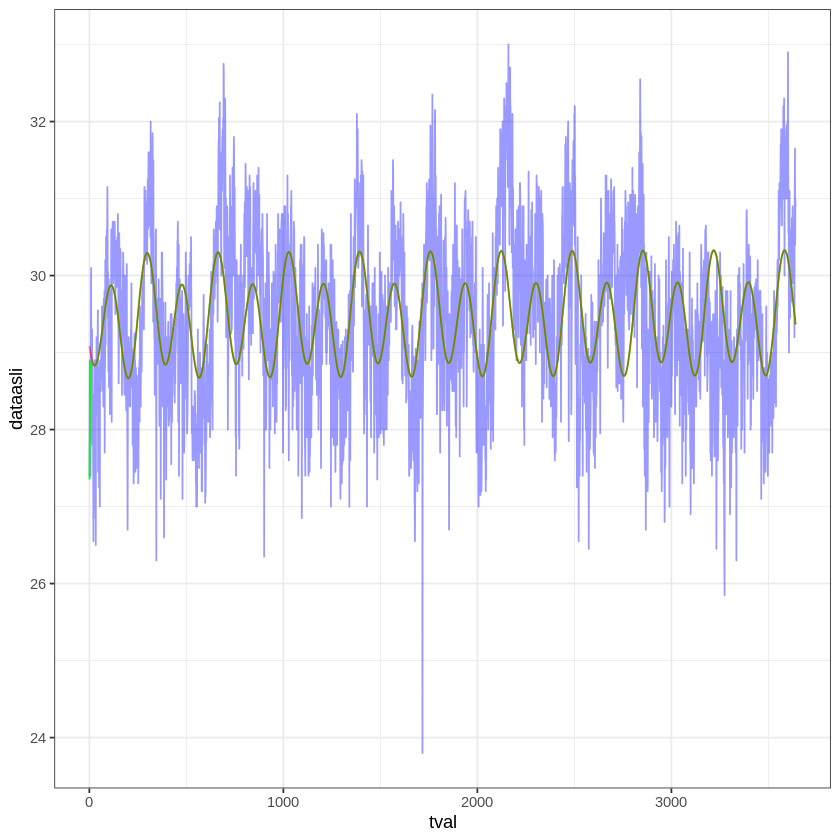

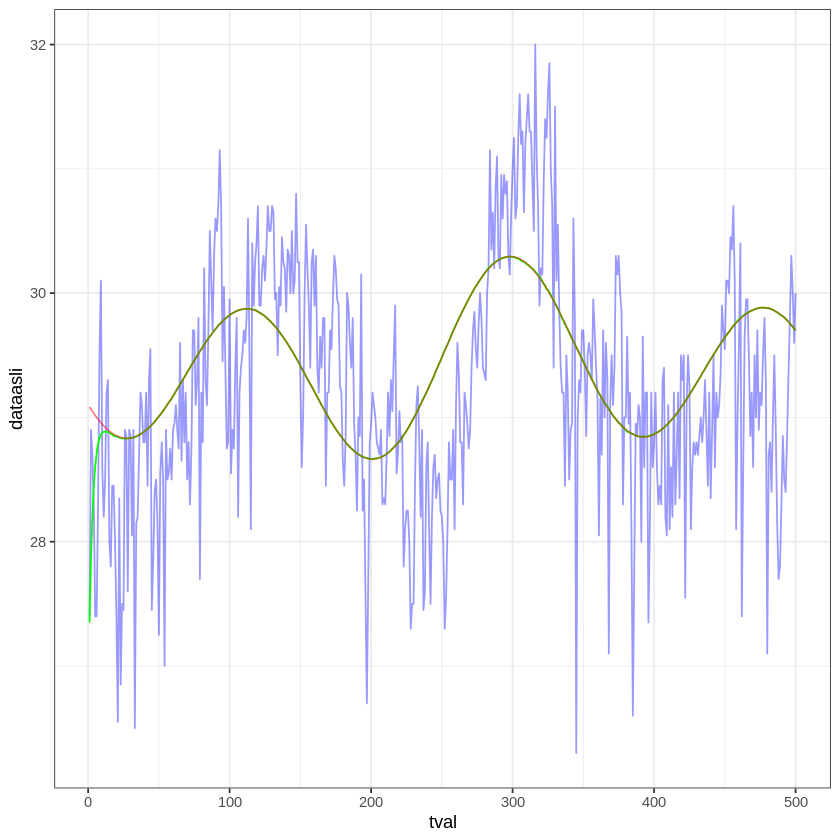

In [ ]:
set.seed(123)  # Gantilah nilai alpha sesuai kebutuhan
par2 <- data_2$varians
jum <- 100000
N <- nrow(data_2)
Dt <- 1
T0<-27.40
TM0<-29.13285
simulations <- matrix(NA, nrow = N, ncol = jum)

for (sim in 1:jum) {
  X <- numeric(N)
  X[1] <- T0 - TM0
  for (i in 1:(N-1)) {
    X[i+1] <- rnorm(1, X[i]*exp(-alpha), par2[i]/(-alpha*2)*(exp(-alpha*2)-1))
  }
  simulations[, sim] <- X + data_2$MeanTemp
}
mean_simulations1 <- rowMeans(simulations, na.rm = TRUE)
df14<-data.frame(tval=seq(1,N),dataasli=data_2$mean,MeanTemp=data_2$MeanTemp,OU=mean_simulations1[1:nrow(data_2)])
ggplot(df14, aes(x = tval)) +
  geom_line(aes(y = dataasli), color = "blue", alpha = 0.4) +
  geom_line(aes(y = OU), color = "green", alpha = 1) +
  geom_line(aes(y = MeanTemp), color = "red", alpha = 0.5) +
  theme_bw()
df15<-data.frame(tval=seq(1,500),dataasli=data_2$mean[1:500],MeanTemp=data_2$MeanTemp[1:500],OU=mean_simulations1[1:500])
ggplot(df15, aes(x = tval)) +
  geom_line(aes(y = dataasli), color = "blue", alpha = 0.4) +
  geom_line(aes(y = OU), color = "green", alpha = 1) +
  geom_line(aes(y = MeanTemp), color = "red", alpha = 0.5) +
  theme_bw()
mape_Ozaki<- MAPE(data_2$mean, mean_simulations1[1:nrow(data_2)])

In [ ]:
print(mape_Ozaki)

[1] 2.454733
